In [1]:
%load_ext snakeviz

In [9]:
# %%snakeviz
import numpy as np
import random
import logging

from LoopStructural import GeologicalModel
import lavavu
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural import GeologicalModel
from LoopStructural.utils import log_to_file
# logging.basicConfig(level=logging.DEBUG, format='%(message)s')
# log_to_file('./full_model_7/ls.log')
nel_scale=1
fault_params = {'interpolatortype':'FDI',
                'nelements':5e4,
#                 'data_region':.1,
#                 'buffer':0,
                'fault_buffer':0.1,
                'solver':'pyamg',
                'step':10,
#                 overprints:overprints,
                'cpw':10,
                'npw':10,
#                 'tol':1e-8
               }
foliation_params = {'interpolatortype':'FDI' , # 'interpolatortype':'PLI',
                'nelements':1e5,  # how many tetras/voxels
                'data_region':.1,  # how much to extend nterpolation around box
                'solver':'pyamg',
                'damp':True}

# foliation_params = {'nelements':1e5,  # how many tetras/voxels
#                     'buffer':2.5,  # how much to extend nterpolation around box
#                     'solver':'pyamg',
#                     'interpolatortype':'FDI',
#                     'damp':True}

model, m2l_data = GeologicalModel.from_map2loop_directory('./model-test',
                                                        skip_faults=False,
                                                          rescale=False,
                                                          evaluate=False,
                                                        fault_params=fault_params,
                                                        foliation_params=foliation_params)
for f in model.features:
    if f.type == 'fault':
        print(f[0].interpolator.nx)
model.update()




2431
120
2730
1320
1680
336
13398
3276
3360
6048
910
144
288
120
3192
4550
4032
16660
2145
910
140
400
400


  0%|          | 0/70 [00:00<?, ?it/s]

In [10]:
view = LavaVuModelViewer(model,vertical_exaggeration=1) 
# view.nsteps = np.array([200,200,200])
# #view.set_zscale(2)
# view.add_model(cmap='tab20')    

# for sg in model.feature_name_index:
#     if( 'super' in sg):
#         view.add_data(model.features[model.feature_name_index[sg]])

# view.nsteps=np.array([100,100,50])
# filename=vtk_path+'surface_name_{}.vtk'
view.add_model_surfaces(faults=False)#filename=filename)
view.nelements=1e6
view.add_model_surfaces(strati=False)
#view.lv.webgl(vtk_path+test_data_name)
view.add_data(model['supergroup_0'])
#view.interactive()  


view.interactive()

  0%|          | 0/12 [00:00<?, ?it/s]

Adding surfaces took 2.617884397506714 seconds


  0%|          | 0/23 [00:00<?, ?it/s]

Adding surfaces took 54.85513758659363 seconds



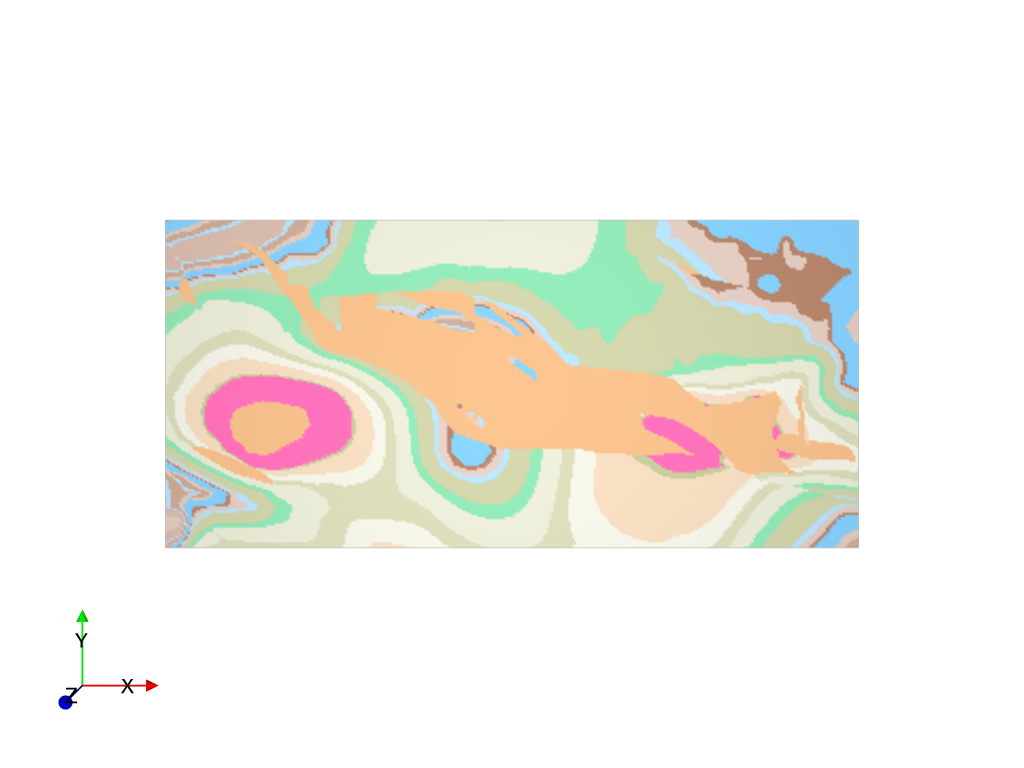

In [6]:
view.clear()
view.nelements=1e6
view.add_model()#data(model['supergroup_0'])
view.display()

In [8]:
print(model)

Instance of LoopStructural.GeologicalModel 
------------------------------------------ 
Model origin: 515028.5 7454131.25 -6000.0
Model maximum: 632971.5 7509868.75 1200.0
Model rescale factor: 117943.0 
The model contains 0 GeologicalFeatures 
------------------------------------------ 
GeologicalFeature: Fault_439 of type - fault 
GeologicalFeature: Fault_1778_1 of type - fault 
GeologicalFeature: Fault_192 of type - fault 
GeologicalFeature: Fault_846 of type - fault 
GeologicalFeature: Fault_951 of type - fault 
GeologicalFeature: Fault_72 of type - fault 
GeologicalFeature: Fault_791 of type - fault 
GeologicalFeature: Fault_852 of type - fault 
GeologicalFeature: Fault_131 of type - fault 
GeologicalFeature: Fault_1776 of type - fault 
GeologicalFeature: Fault_155 of type - fault 
GeologicalFeature: Fault_625 of type - fault 
GeologicalFeature: Fault_472 of type - fault 
GeologicalFeature: Fault_562 of type - fault 
GeologicalFeature: Fault_294 of type - fault 
GeologicalFeature:

In [ ]:
%%snakeviz
import numpy as np
import random
import logging

from LoopStructural import GeologicalModel
import lavavu
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural import GeologicalModel
from LoopStructural.utils import log_to_file
# logging.basicConfig(level=logging.DEBUG, format='%(message)s')
log_to_file('full_model_lg.log')

fault_params = {'interpolatortype':'FDI',
                'nelements':1e3,
                'data_region':.1,
                'solver':'pyamg',
                'step':10,
#                 overprints:overprints,
                'cpw':10,
                'npw':10,
                'tol':1e-8
               }
foliation_params = {'interpolatortype':'FDI' , # 'interpolatortype':'PLI',
                    'nelements':1e5/4,  # how many tetras/voxels
                    'buffer':0.8,  # how much to extend nterpolation around box
                    'solver':'pyamg',
                    'damp':True}

# foliation_params = {'nelements':1e5,  # how many tetras/voxels
#                     'buffer':2.5,  # how much to extend nterpolation around box
#                     'solver':'pyamg',
#                     'interpolatortype':'FDI',
#                     'damp':True}

model2, m2l_data = GeologicalModel.from_map2loop_directory('./full_model_lg',
                                                        skip_faults=False,
                                                        fault_params=fault_params,
                                                        foliation_params=foliation_params)






In [ ]:
view2 = LavaVuModelViewer(model2,vertical_exaggeration=1) 
# view.nsteps = np.array([200,200,200])
# #view.set_zscale(2)
# view.add_model(cmap='tab20')    

# for sg in model.feature_name_index:
#     if( 'super' in sg):
#         view.add_data(model.features[model.feature_name_index[sg]])

view2.nsteps=np.array([100,100,50])
# filename=vtk_path+'surface_name_{}.vtk'
view2.add_model_surfaces()#filename=filename)
#view.lv.webgl(vtk_path+test_data_name)

#view.interactive()  


view2.interactive()

In [ ]:
model1vals = model.evaluate_model(model.regular_grid(),scale=False)
model2vals = model2.evaluate_model(model.regular_grid(),scale=False)

In [ ]:
import matplotlib.pyplot as plt
plt.hist(model1vals)

In [ ]:
diff = model1vals-model2vals

In [ ]:
plt.hist(diff)

In [ ]:
model.regular_grid?

In [ ]:
from LoopStructural.modelling.features.lambda_geological_feature import LambdaGeologicalFeature

In [ ]:
view3 = LavaVuModelViewer(model)
lambdafeature = LambdaGeologicalFeature(lambda xyz : model.evaluate_model(xyz,scale=False)-model2.evaluate_model(xyz,scale=False),model=model)
view3.add_scalar_field(lambdafeature)
view3.model = model2
view3.add_model_surfaces()
view3.interactive()

In [ ]:
from functools import partial

In [ ]:
class test:
    def __init__(self):
        pass
    @property
    